### MidTerm Assignment: notebook 1: Revision


<p><font color='red'><b>Given date : March 30</b></font></p>

<font color='red'><b>Due date : April 17</b></font>


#### Total : 10 pts 

#### Question 1.1. Statistical learning: Maximum likelihood (Total 5pts)

This exercise contains a pen and paper part and a coding part. You should submit the pen and paper either in lateX or take a picture of your written solution and join it to the Assignment folder. 

We consider the dataset given below. This dataset was generated from a Gaussian distribution with a given mean $\mathbf{\mu} = (\mu_1, \mu_2)$ and covariance matrix $\mathbf{\Sigma} = \left[\begin{array}{cc}
\sigma_1^2 & 0 \\
0 & \sigma_2^2
\end{array}\right]$. We would like to recover the mean and variance from the data. In order to do this, use the following steps:

1. Write the general expression for the probability (multivariate (2D) Gaussian with diagonal covariance matrix) to observe a single sample 
2. We will assume that the samples are independent and identically distributed so that the probability of observing the whole dataset is the product of the probabilties of observing each one of the samples $\left\{\mathbf{x}^{(i)} = (x_1^{(i)}, x_2^{(i)})\right\}_{i=1}^N$. Write down this probability
3. Take the negative logarithm of this probability
4. Once you have taken the logarithm, find the expression for $mu_1, \mu_2$, $\sigma_1$ and $\sigma_2$ by maximizing the probability. 

1. the probability to observe a single sample is

$$ p(x)=\frac{1}{(2\pi)^{\frac{d}{2}}|\Sigma|^{\frac{1}{2}}} \exp \left( -\frac{1}{2} (x-\mu)^\top \Sigma^{-1} (x-\mu) \right)$$

in which $d$ represents the dimension. In this case, $d=2$, and hence

$$ p(x)=\frac{1}{2\pi\sigma_1\sigma_2} \exp \left( -\frac{1}{2} \left((x_1-\mu_1)^2/\sigma_1^2 + (x_2-\mu_2)^2/\sigma_2^2\right) \right)$$

2. the probability of observing the whole dataset is

$$p(\mathbf{x}) = p(x^{(1)}) \cdot p(x^{(2)}) = \frac{1}{(2\pi\sigma_1\sigma_2)^2} \exp 
\left( -\frac{1}{2} \left((x^{(1)}_1-\mu_1)^2/\sigma_1^2 + (x^{(1)}_2-\mu_2)^2/\sigma_2^2 + (x^{(2)}_1-\mu_1)^2/\sigma_1^2 + (x^{(2)}_2-\mu_2)^2/\sigma_2^2\right) \right)$$
                   
3. the negative logarithm of this probability is

$$-\log p(\mathbf{x}) = 2\log (2\pi\sigma_1\sigma_2) + \frac{1}{2} \left((x^{(1)}_1-\mu_1)^2/\sigma_1^2 + (x^{(1)}_2-\mu_2)^2/\sigma_2^2 + (x^{(2)}_1-\mu_1)^2/\sigma_1^2 + (x^{(2)}_2-\mu_2)^2/\sigma_2^2\right) $$

4. to maximize $p(\mathbf{x})$, it is equivanlent to minimize $-\log p(\mathbf{x})$. Take derivative of it,

$$\partial [-\log p(\mathbf{x})] / \partial \mu_1 = - (x^{(1)}_1-\mu_1)/\sigma_1^2 - (x^{(2)}_1-\mu_1)/\sigma_1^2 = 0
\rightarrow \mu_1 = \frac{x^{(1)}_1+x^{(2)}_1}{2}$$

$$\partial [-\log p(\mathbf{x})] / \partial \mu_2 = - (x^{(1)}_2-\mu_2)/\sigma_2^2 - (x^{(2)}_2-\mu_2)/\sigma_2^2 = 0
\rightarrow \mu_2 = \frac{x^{(1)}_2+x^{(2)}_2}{2}$$

$$\partial [-\log p(\mathbf{x})] / \partial \sigma_1 = \frac{2}{\sigma_1} - 2(x^{(1)}_1-\mu_1)^2/\sigma_1^3 - 2(x^{(2)}_1-\mu_1)^2/\sigma_1^3 = 0
\rightarrow \sigma_1 = \sqrt{(x^{(1)}_1-\mu_1)^2+(x^{(2)}_1-\mu_1)^2}$$

$$\partial [-\log p(\mathbf{x})] / \partial \sigma_2 = \frac{2}{\sigma_2} - 2(x^{(1)}_2-\mu_2)^2/\sigma_2^3 - 2(x^{(2)}_2-\mu_2)^2/\sigma_2^3 = 0
\rightarrow \sigma_2 = \sqrt{(x^{(1)}_2-\mu_2)^2+(x^{(2)}_2-\mu_2)^2}$$

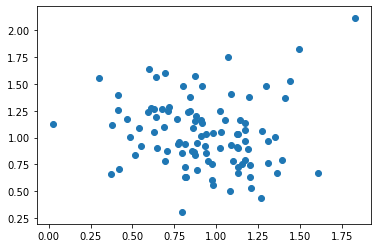

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
X = loadmat('dataNotebook1_Ex1.mat')['X']

plt.scatter(X[:,0], X[:,1])
plt.show()

5. Once you have you estimates for the parameters of the Gaussian distribution, plot the level lines of that distribution onb top of the points by using the lines below. 

In [3]:
import matplotlib.pyplot as plt
from matplotlib import cm
x1 = np.linspace(0, 1.85, 100)
x2 = np.linspace(0.25, 2.5, 100)

xx1, xx2 = np.meshgrid(x1, x2)

from scipy.stats import multivariate_normal

xmesh = np.vstack((xx1.flatten(), xx2.flatten())).T

mu1 = np.mean(X[:,0])
mu2 = np.mean(X[:,1])
sigma1 = np.sqrt(np.sum((X[:,0] - mu1)**2))
sigma2 = np.sqrt(np.sum((X[:,1] - mu2)**2))
sigma = np.zeros((2,2))
sigma[0,0] = sigma1**2
sigma[1,1] = sigma2**2

y = multivariate_normal.pdf(xmesh, mean=[mu1, mu2], cov=sigma)


#### What you should obtain:

C:\Users\zheyu\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  


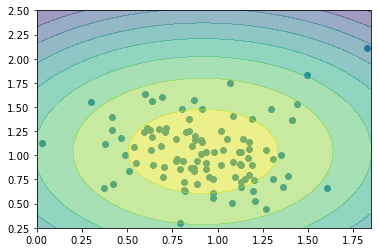

In [4]:

plt.scatter(X[:,0], X[:,1])
plt.contourf(xx1, xx2, np.reshape(y, (100, 100)), zdir='z', offset=-0.15, cmap=cm.viridis, alpha=0.5)
plt.show()

#### 1.2. We consider the following linear regression problem. (Total 5pts)

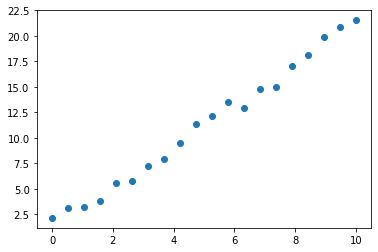

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
X = loadmat('MidTermAssignment_dataEx2.mat')['MidTermAssignment_dataEx2']

plt.scatter(X[:,0], X[:,1])
plt.show()

Solve the $\ell_2$ regularized linear regression problem __through the normal equations__ (be careful that you have to take the $\ell_2$regularization into account). Then double-check your solution by comparing it with the regression function from scikit learn. Plot the result below.

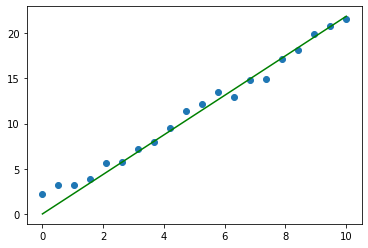

In [6]:
class l2_regularized_regression:
    def __init__(self, alpha=0.1, fit_intercept=False):
        self.fit_intercept = False
        self.alpha = alpha

    def fit(self, X, Y):
        if self.fit_intercept:
            nX = np.ones((X.shape[0], X.shape[1]+1))
            nX[:,:X.shape[1]] = X
            X = nX
        self.W = np.matmul(np.matmul(X.T, 
                                     np.linalg.inv(np.matmul(X, X.T) + self.alpha * np.eye(len(X)))), 
                           Y)
        
    def predict(self, X):
        if self.fit_intercept:
            nX = np.ones((X.shape[0], X.shape[1]+1))
            nX[:,:X.shape[1]] = X
            X = nX
        return np.matmul(X, self.W)
    
model = l2_regularized_regression()
model.fit(np.atleast_2d(X[:,0]).T, np.atleast_2d(X[:,1]).T)
z = model.predict(np.atleast_2d(X[:,0]).T)
plt.scatter(X[:,0], X[:,1])
plt.plot(X[:,0], z, 'g')

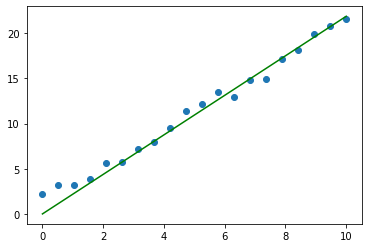

In [7]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1, fit_intercept=False)
model.fit(np.atleast_2d(X[:,0]).T, np.atleast_2d(X[:,1]).T)
z = model.predict(np.atleast_2d(X[:,0]).T)
plt.scatter(X[:,0], X[:,1])
plt.plot(X[:,0], z, 'g')

2.3. __Kernel Ridge regression__. Given the 'Normal Equations' solution to the regularized regression model, we now want to turn the regression model into a formulation over kernels. 


__2.3.1. Start by showing (one line) that this solution can read as__ 

$$\mathbf{\beta} = \mathbf{X}^T\left(\mathbf{K} + \lambda\mathbf{I}_N\right)^{-1}\mathbf{t}$$

where $\mathbf{K}$ is the kernel matrix defined from the scalar product of the prototypes, i.e. $\mathbf{K}_{i,j} = \kappa(\mathbf{x}^{(i)}, \mathbf{x}^{(j)}) = (\mathbf{x}^{(i)})^T(\mathbf{x}^{(j)})$. 

__2.3.2.__ Given this, the classifier can read as $f(\mathbf{x}) = \mathbf{\beta}^T\mathbf{x} = \sum_{i=1}^N \alpha_i \kappa(\mathbf{x}, \mathbf{x}_i)$. What are the $\alpha$ in this case?

__2.3.3.__ We will apply this idea to text data. Using kernels with text data is interesting because it is usually easier to compare documents than to find appropriate features to represent those documents.  The file 'headlines_train.txt' contains a few headlines, some of them being about finance, others being about weather forecasting. Use the first group of lines below to load those lines and their associated targets (1/0).  

**2.3.1.** Solve $\min \Vert \mathbf{t} - \mathbf{\beta}^\top \phi(\mathbf{X}) \Vert^2 + \lambda \Vert \mathbf{\beta} \Vert_2$ by taking derivatives of it, then we can get $\mathbf{\beta} = \phi^\top(\mathbf{X})\left(\mathbf{K} + \lambda\mathbf{I}_N\right)^{-1}\mathbf{t}$

**2.3.2.** $f(\mathbf{x}) = \mathbf{\beta}^T \phi(\mathbf{x}) = \sum_{i=1}^N \left(\left(\mathbf{K} + \lambda\mathbf{I}_N\right)^{-1}\mathbf{t}\right) \phi^\top(\mathbf{x}_i) \phi(\mathbf{x})=\sum_{i=1}^N \left(\left(\mathbf{K} + \lambda\mathbf{I}_N\right)^{-1}\mathbf{t}\right) \kappa(\mathbf{x}, \mathbf{x}_i)$, so $\alpha_i=\left(\mathbf{K} + \lambda\mathbf{I}_N\right)^{-1}\mathbf{t}$

In [8]:
# Start by loading the file using the lines below 
import numpy as np
import codecs
f = codecs.open('headlines_train.txt', "r", encoding='utf8')
lines = f.readlines()
f.close()

sentences = ['Start']
target = [0]

for l in np.arange(len(lines)-2):
    if l%2 == 0:
        lines_tmp = lines[l]
        lines_tmp = lines_tmp[:-1]
        sentences.append(lines_tmp)
        if lines_tmp[-1] == ' ':
            target.append(float(lines_tmp[-2]))
        else:
            target.append(float(lines_tmp[-1]))
        
sentences = sentences[1:]
target = target[1:]

__2.3.4.__ Now use the lines below to define the kernel. The kernel is basically built by generating a TF-IDF vector for each sentence and comparing those sentences through a cosine similarity measure. the variable 'kernel' the kernel matrix, i.e. $\kappa(i,j) = \frac{\phi_i^T\phi_j}{\|\phi_i\|\|\phi_j\|}$ where the $\phi_i$ encodes the tf-idf vectors. Use the lines below to compute the kernel matrix. 

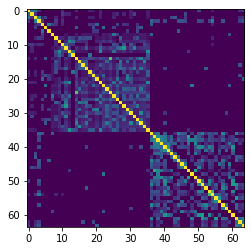

In [9]:
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features=100, stop_words='english',
                                 decode_error='ignore')

tfidf = vect.fit_transform(sentences)



from sklearn.metrics.pairwise import cosine_similarity
kernel = cosine_similarity(tfidf)

import matplotlib.pyplot as plt
plt.imshow(kernel)
plt.show()

__2.3.4.__ Once you have the kernel matrix, compute the weights $\alpha$ of the classifier $y(\mathbf{x}) = \sum_{i\in \mathcal{D}}\alpha_i \kappa(\mathbf{x}, \mathbf{x}_i)$. 

In [10]:
# compute the alpha weights
target = np.array(target)
lamb = 0.1
alpha = np.matmul(np.linalg.inv(kernel + lamb * np.eye(len(kernel))), target)
print(alpha.shape)

(64,)


__2.3.5.__ Now that you have the weights, we want to apply the classifier to a few new headlines. Those headlines are stored in the file 'headlines_test.txt'. Use the lines below to load those sentences and compute their TF-IDF representation. the classifier $y(\mathbf{x}) = \sum_{i\in \mathcal{D}}\alpha_i \kappa(\mathbf{x}, \mathbf{x}_i)$ 

In [11]:
# Start by loading the file using the lines below 
import numpy as np

f = codecs.open('headlines_test.txt', "r", encoding='utf8')
lines = f.readlines()
f.close()

sentences_test = ['Start']

for l in np.arange(len(lines)):
    if l%2 == 0:
        lines_tmp = lines[l]
        lines_tmp = lines_tmp[:-1]
        sentences_test.append(lines_tmp)
        
sentences_test = sentences_test[1:]

tfidf_test = vect.transform(sentences_test)

test_F = np.hstack((tfidf_test.todense(), np.zeros((4, 100-np.shape(tfidf_test.todense())[1]))))

__2.3.6.__ Once you have the tf-idf representations stored in the matrix test_F (size 4 by 100 features) the value $\kappa(\mathbf{x}, \mathbf{x}_i)$ that you need to get the final classifier $y(\mathbf{x}) = \sum_{i\in \mathcal{D}}\alpha_i \kappa(\mathbf{x}, \mathbf{x}_i)$ and hence the target of the new sentences, you need to compute the cosine similarity of the new "test" tf-idf vectors with the "training" tf-idf vectors which you computed earlier. each of those cosine similarities will give you an entry in $\kappa(\mathbf{x}, \mathbf{x}_i)$ (here $\mathbf{x}$ denotes any of the fixed test sentences). once you have those similarities, compute the target from your $\alpha$ values as $t(\mathbf{x}) = \sum_{i\in \text{train}} \alpha_i\kappa(\mathbf{x}, \mathbf{x}_i)$. print those targets below. 

In [12]:
kernel = cosine_similarity(tfidf, test_F)
z = np.matmul(alpha, kernel)
print(np.round(z))

[-0.  1.  0.  1.]
